# EDA and Preprocessing


Importing libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

Uploading dataset

In [6]:
df = pd.read_csv("student-lpor.csv")

In [7]:
# Dataset 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13


Dataset caracteristics

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  schoolsup   649 non-null    object
 15  famsup      649 non-null    object
 16  paid        649 non-null    object
 17  activities  649 non-null    object
 18  nursery     649 non-null    object
 19  higher      649 non-null    object
 20  internet  

Dataset shape

In [10]:
df.shape

(649, 31)

The dataset has 649 observations and 30 features, with numbers, decimals and objects included

In [11]:
# Check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64

there are no missing values

In [12]:
# Checking for duplicates
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 31)

There are no duplicates

# Features preprocesing

Replacing categorical values for numerical values

In [16]:
df['school'].replace({'GP': 0, 'MS': 1}, inplace=True)
df['sex'].replace({'F': 0, 'M': 1}, inplace=True)
df['address'].replace({'U': 0, 'R': 1}, inplace=True)
df['famsize'].replace({'LE3': 0, 'GT3': 1}, inplace=True)
df['Pstatus'].replace({'T': 0, 'A': 1}, inplace=True)
df['Mjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}, inplace=True)
df['Fjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}, inplace=True)
df['reason'].replace({'home': 0, 'reputation': 1, 'course': 2, 'other': 3}, inplace=True)
df['guardian'].replace({'mother': 0, 'father': 1, 'other': 3}, inplace=True)
df['schoolsup'].replace({'yes': 0, 'no': 1}, inplace=True)
df['famsup'].replace({'yes': 0, 'no': 1}, inplace=True)
df['paid'].replace({'yes': 0, 'no': 1}, inplace=True)
df['activities'].replace({'yes': 0, 'no': 1}, inplace=True)
df['nursery'].replace({'yes': 0, 'no': 1}, inplace=True)
df['higher'].replace({'yes': 0, 'no': 1}, inplace=True)
df['internet'].replace({'yes': 0, 'no': 1}, inplace=True)
df['romantic'].replace({'yes': 0, 'no': 1}, inplace=True)

In [17]:
# Checking that the replacement was done correctly
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,1,1,4,4,3,0,...,1,4,3,4,1,1,3,4,0,11
1,0,0,17,0,1,0,1,1,3,4,...,1,5,3,3,1,1,3,2,9,11
2,0,0,15,0,0,0,1,1,3,4,...,1,4,3,2,2,3,3,6,12,13
3,0,0,15,0,1,0,4,2,1,2,...,0,3,2,2,1,1,5,0,14,14
4,0,0,16,0,1,0,3,3,4,4,...,1,4,3,2,1,2,5,0,11,13


In [18]:
# checking that there are only numerical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   famsize     649 non-null    int64
 5   Pstatus     649 non-null    int64
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int64
 9   Fjob        649 non-null    int64
 10  reason      649 non-null    int64
 11  guardian    649 non-null    int64
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  schoolsup   649 non-null    int64
 15  famsup      649 non-null    int64
 16  paid        649 non-null    int64
 17  activities  649 non-null    int64
 18  nursery     649 non-null    int64
 19  higher      649 non-null    int64
 20  internet    649 non-null    int6

In [19]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.303544,0.704160,0.123267,2.514638,2.306626,2.707242,3.049307,...,0.631741,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,1.348511,1.218696,...,0.482704,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,...,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,4.000000,...,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,4.000000,3.000000,4.000000,4.000000,...,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000


All the variables are now numericals

# Exploring data through visualizations

According to the information, there are continuous numerical variables in the dataset
lets plot the first semester grades

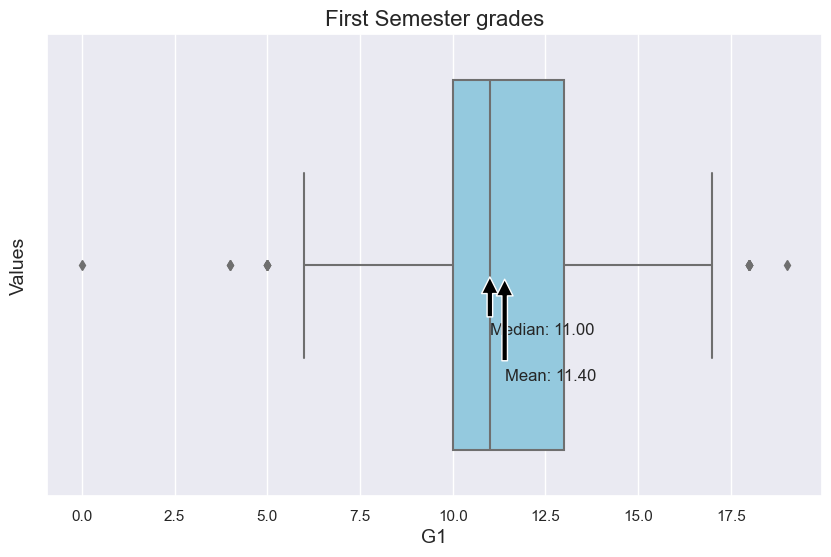

In [37]:
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['G1'], ax=ax, color="skyblue")
ax.set_title('First Semester grades', fontsize=16)
ax.set_xlabel('G1', fontsize=14)
ax.set_ylabel('Values', fontsize=14)

median = df['G1'].median()
mean = df['G1'].mean()
ax.annotate(f'Median: {median:.2f}', xy=(median, 0.02), xytext=(median, 0.15),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12,)
ax.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.02), xytext=(mean, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12,)

plt.show()

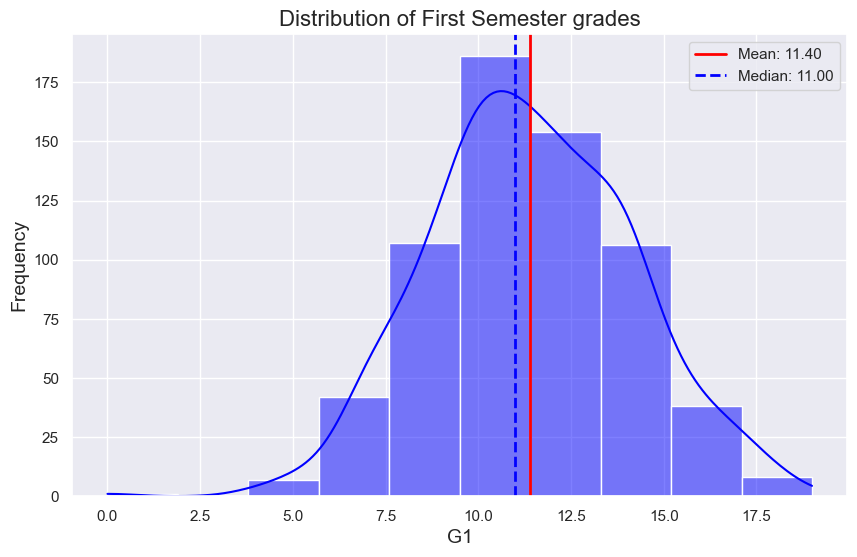

In [33]:
# Exploring with a histogram Fist Semester Grades 

median = df['G1'].median()
mean = df['G1'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(df['G1'], kde=True, color='blue', bins=10)
plt.title('Distribution of First Semester grades', fontsize=16)
plt.xlabel('G1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(mean, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
plt.legend()
plt.show()

Let's check if the second grades scores follow a similar tendency 
Exploring with a histogram Second Semester Grades

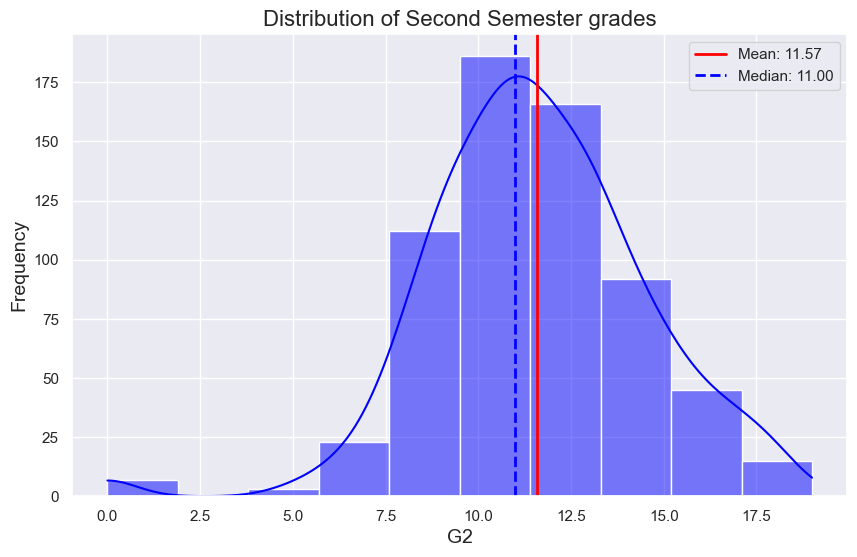

In [38]:
median = df['G2'].median()
mean = df['G2'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(df['G2'], kde=True, color='blue', bins=10)
plt.title('Distribution of Second Semester grades', fontsize=16)
plt.xlabel('G2', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(mean, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
plt.legend()
plt.show()

Checking for correlations inside the data a heatmap will be done

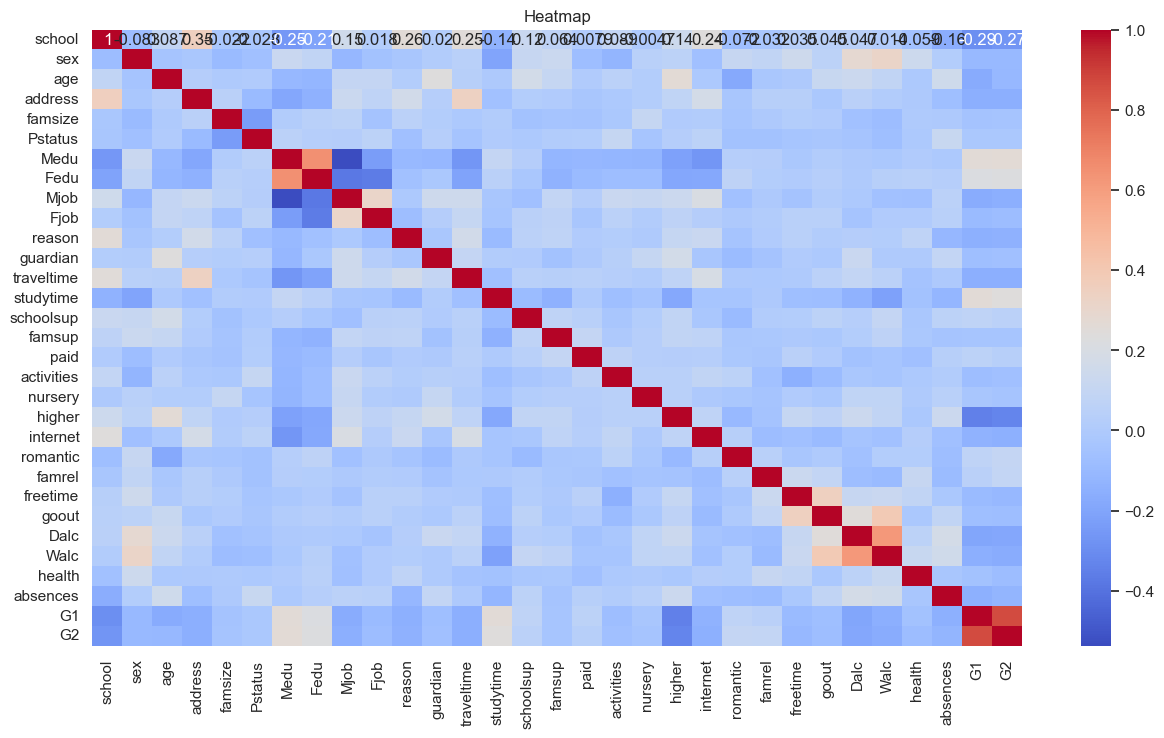

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");
plt.title("Heatmap")
plt.show()
plt.savefig('coolwarm.png')

According to the Heatmap, G1, and G2 are highly correlated, let's see these features  in a scatterplot

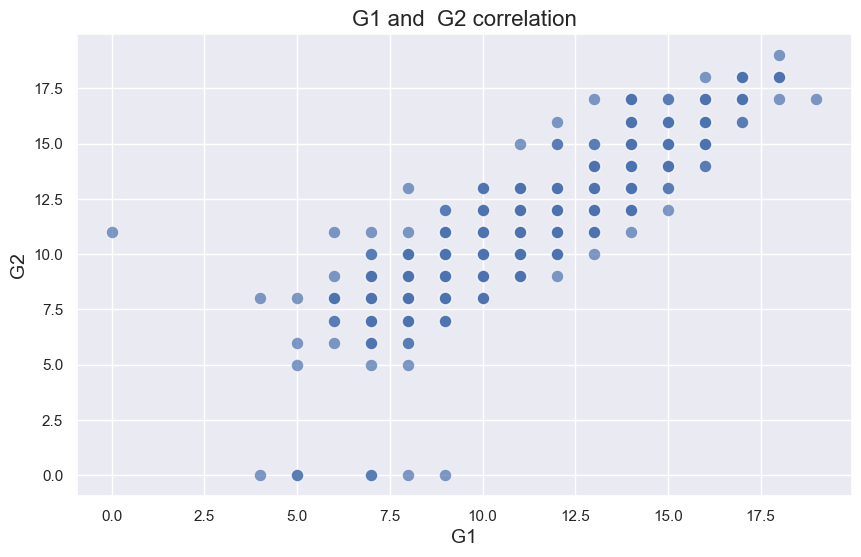

In [20]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=df['G1'], y=df['G2'], palette='viridis', s=80, alpha=0.7)
plt.title('G1 and  G2 correlation', fontsize=16)
plt.xlabel('G1', fontsize=14)
plt.ylabel('G2', fontsize=14)
plt.grid(True)
plt.show()

# Machine Learning Implementation and Evaluation

Storage of the independent variables and dependent variable 

In [24]:
X = df.iloc[:, :30]
y = df.iloc[:, 30]

In [25]:
print(X)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        0        1        1     4     4     3     0  ...   
1         0    0   17        0        1        0     1     1     3     4  ...   
2         0    0   15        0        0        0     1     1     3     4  ...   
3         0    0   15        0        1        0     4     2     1     2  ...   
4         0    0   16        0        1        0     3     3     4     4  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        1        1        0     2     3     2     4  ...   
645       1    0   18        0        0        0     3     1     0     2  ...   
646       1    0   18        0        1        0     1     1     4     4  ...   
647       1    1   17        0        0        0     3     1     2     2  ...   
648       1    1   18        1        0        0     3     2     2     4  ...   

     internet  romantic  fa

In [26]:
print(y)

0      11
1      11
2      13
3      14
4      13
       ..
644    11
645    15
646    12
647    10
648    11
Name: G2, Length: 649, dtype: int64


# Splitting Data into Training and Testing

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

Checking of the split was correctly done

In [30]:
X.shape, X_train.shape, X_test.shape

((649, 30), (519, 30), (130, 30))

# KNN regression model

Firstly is necesary to determinated the number of k neighbours for this model

In [50]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
neighbors = np.arange(1, 100)                  
train_accuracy = np.zeros(len(neighbors))     
test_accuracy = np.zeros(len(neighbors)) 

In [51]:
for i, k in enumerate(neighbors):                         
    kNN = KNeighborsRegressor(n_neighbors = k)          

    
     kNN.fit(X_train, y_train)                              

   
    train_accuracy[i] = kNN.score(X_train, y_train)       

   
    test_accuracy[i] = kNN.score(X_test, y_test)  

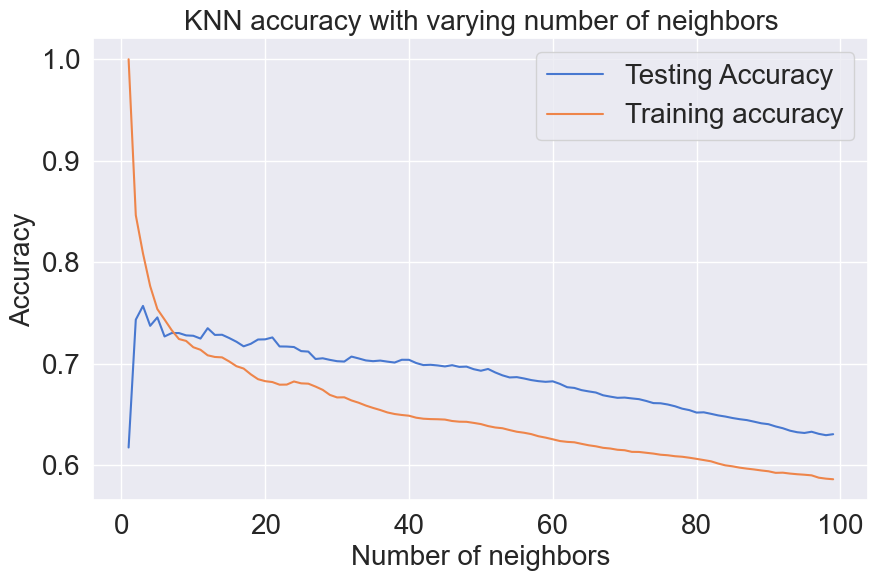

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')

plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

According to the chart, the number of K neighbors would be around 11

# KNN regressor Hypertuning 

Applying again the model but with 11 neighbours

In [32]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors = 11)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [36]:
y_pred_knn = reg.predict(X_test)

Calculating Erro,  the R^2 score

In [37]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.72


In [38]:
print("training set score: {:.2f}".format(reg.score(X_train, y_train)))
print("test set score: {:.2f}".format(reg.score(X_test, y_test)))

training set score: 0.71
test set score: 0.72


Display the test and predicted values

In [39]:
df_compare_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
df_compare_knn.head()

,Actual,Predicted
283,11,10.545455
219,9,9.545455
270,15,13.818182
178,8,8.727273
334,15,13.454545


# Cross Validation for KNN regression

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
# Perform cross-validation and get R2 scores
cross_val_scores = cross_val_score(reg, X, y, cv=10, scoring='r2')

# Print the average R2 score across all folds
average_r2 = np.mean(cross_val_scores)
print(f"\nAverage R2 Score: {average_r2}")


Average R2 Score: 0.6323658756846957


# Linear regression 

In [101]:
# import library
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [102]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)


In [103]:
# Calculate the predicted values
y_linear_pred = lr.predict(X_test)

In [104]:
print("training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

training set score: 0.74
test set score: 0.83


In [105]:
# Calculate the error values

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_linear_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_linear_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_linear_pred)))

Mean Absolute Error: 0.9229301369822427
Mean Squared Error: 1.462116347788495
Root Mean Squared Error: 1.209180031173396


# Cross-validation for Linear regression 

In [106]:
# Perform cross-validation and get R2 scores
cross_val_scores = cross_val_score(lr, X, y, cv=10, scoring='r2')

# Print the average R2 score across all folds
average_r2 = np.mean(cross_val_scores)
print(f"\nAverage R2 Score: {average_r2}")


Average R2 Score: 0.6555704714370751


In [107]:
# Comparative of real values and predictions.
df_compare_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_linear_pred})
df_compare_linear.head()

,Actual,Predicted
283,11,9.922436
219,9,8.710298
270,15,14.343100
178,8,7.919056
334,15,14.326031


In [115]:
# comparison of the models
print("training set score k-NN: {:.2f}".format(reg.score(X_train, y_train)))
print("test set score k-NN: {:.2f}".format(reg.score(X_test, y_test)))
print(f"\nAverage R2 Score: {average_r2}")

print("training set score lineal regression: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score lineal regression: {:.2f}".format(lr.score(X_test, y_test)))
print(f"\nAverage R2 Score: {average_r2}")


training set score k-NN: 0.71
test set score k-NN: 0.72

Average R2 Score: 0.6555704714370751
training set score lineal regression: 0.74
test set score lineal regression: 0.83

Average R2 Score: 0.6555704714370751
